# Introdução a séries temporais

2020-09-18

*** 
Este notebook é baseado no texto escrito pela Profa. Clarice Pachi e serve de apoio para melhor compreensão dos conceitos.
***

## O que é uma série temporal?

***
Qualquer conjunto de observações __ordenadas__ no tempo. 


Podemos definí-la como a realização particular de um processo estocástico, ou seja, trata-se de um conjunto de todas as possíveis trajetórias que se pode observar.
Cada curva formada por uma séries recebe o nome de trajetória do processo físico e o que chamamos de série temporal é uma parte da trajetória.

Cada curva formada por uma séries recebe o nome de trajetória do processo físico e o que chamamos de série temporal é uma parte da trajetória.
***

## Exemplos de séries temporais

***
As séries temporais podem ser __discretas__, ou seja, as observações são obtidas em intervalos de tempo discretos e equidistantes.
***

Vamos ler o arquivo que contém os valores de bytes feitos via canal de internet do Hospital das Clínicas, realizados em um mes. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 3100)
bytes = pd.read_csv('./Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv', sep=',')
bytes.head(20)

,time,bytes
0,2021-09-02 14:11:03,93976728
1,2021-09-02 14:12:03,163203744
2,2021-09-02 14:12:33,89591192
3,2021-09-02 14:13:03,151828552
4,2021-09-02 14:13:33,95153912
5,2021-09-02 14:14:03,70406728
6,2021-09-02 14:14:33,57658640
7,2021-09-02 14:15:03,42912072
8,2021-09-02 14:15:33,111112416
9,2021-09-02 14:16:03,93770688


Vamos converter a coluna "time" inicialmente em um objeto `datetime`; em seguida, vamos convertê-lo em um __índice__. Portanto, o tempo passa a ser um indicador de valor da série. Isto estabelece uma série temporal dentro da linguagem Python.

In [2]:
import datetime


def conversor(strdate):
    #objdate = datetime.datetime.strptime(strdate,'%Y-%m-%dT%H:%M:%S%z')
    objdate = datetime.datetime.strptime(strdate,'%Y-%m-%d %H:%M:%S')
    return objdate
# 'time' column converted to object datetime
bytes['time'] = bytes['time'].map(lambda value: conversor(value))
# 'time' is defined as a index
bytes = bytes.set_index('time')

<AxesSubplot:xlabel='time'>

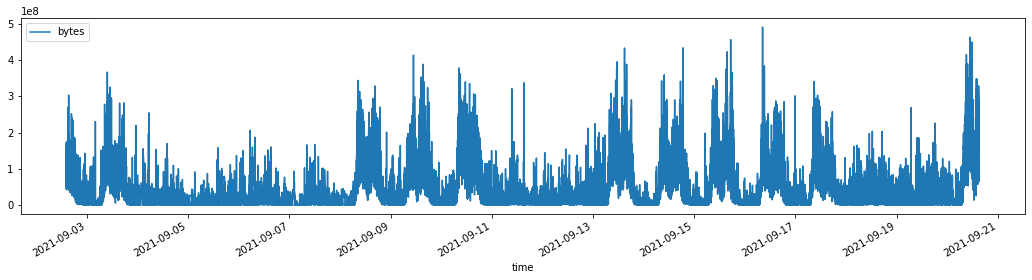

In [3]:
bytes.plot(figsize=(18,4))
# Ocorrerá um warning para algumas situações, mas não precisa se preocupar com isto.

In [33]:
bytes.describe()

,bytes
count,5.000000e+04
mean,2.457851e+07
std,4.522484e+07
min,1.930640e+05
25%,6.026900e+05
50%,1.732300e+06
75%,3.099231e+07
max,4.773556e+08


Um outro gráfico que pode ser feito é o chamado *boxplot*, muito útil para avaliar qual é a mediana em um dado intervalo de tempo, os valores mínimos e máximos, os quartis e os *outliers*, ou seja, valores muito fora da mediana.

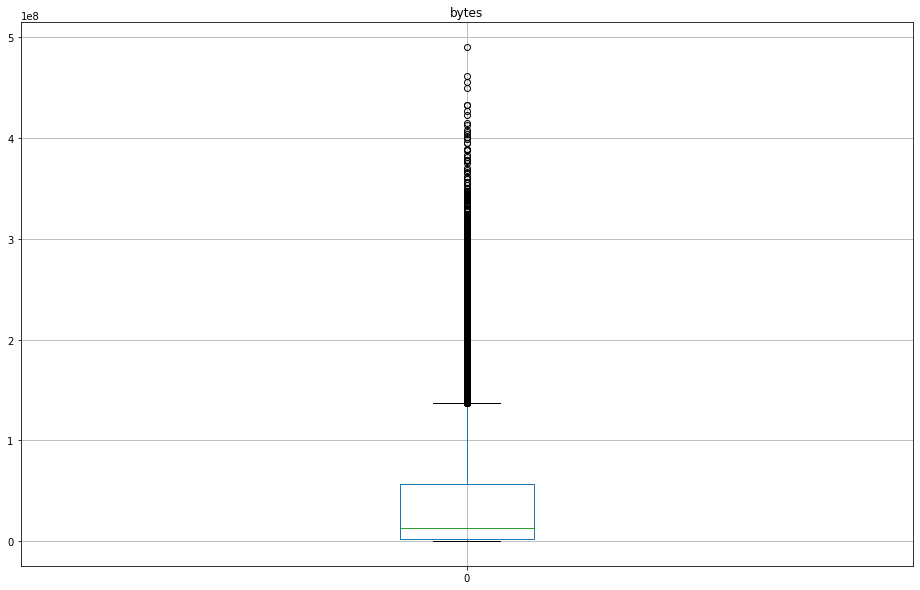

In [4]:
from pandas import Grouper
from pandas import concat
from pandas import DataFrame
# Grouper(freq='M') groups the data by month.
y = bytes.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in y], axis=1)
months = DataFrame(months)
# This number (13) could be represent the quantity of months.
#months.columns = range(14)
months.boxplot(figsize=(16,10))
plt.title("bytes")
plt.show()

As medianas são dadas pelas linhas verdes, as 'caixas' são os quartis, os traços são o mínimo e o máximo e os pontos são os *outliers*. Para aprender um pouco mais sobre a interpretação dos gráficos de *boxplots*, recomenda-se o seguinte *site*: https://operdata.com.br/blog/como-interpretar-um-boxplot/ 

***
As séries também podem ser __contínuas__, como é o caso dos resultados de eletrocardiograma ou de encefalograma.
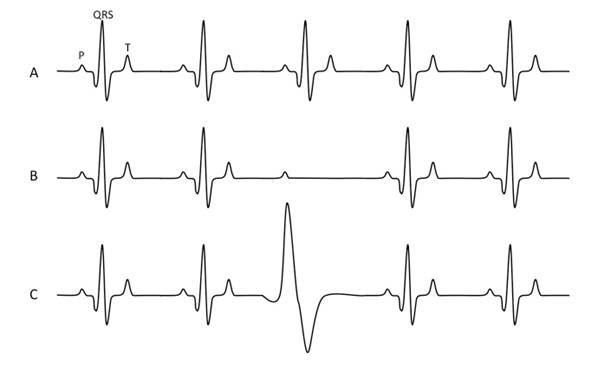
`https://www.dispomed.com/electrocardiogram-ecg/`


Muitas vezes uma série temporal discreta pode ser obtida por meio da **amostragem** de uma série contínua, realizada em intervalos de tempos iguais $ \Delta t$. Assim, em um dado período de tempo $[0,T]$, pode-se obter uma série discreta com $N$ pontos, sendo que $N=\frac{T}{\Delta t}$.
***

## O que é uma média móvel ##

***
**Médias móveis** são comumente usadas em séries temporais com o objetivo de suavizar flutuações curtas e destacar tendências de longo prazo, dependendo da aplicação necessária. Uma média móvel é um estimador calculado a partir de amostras sequenciais da população.
***

### Média móvel simples (SMA - Single Moving Average) ###

***
Considere a série temporal dada por $$ {x_0,\, x_1,\,\ldots,\, x_{t-1},\,x_{t},\, x_{t+1},\,\ldots} $$

Vamos considerar uma média móvel simples com janela 3, ou seja, vamos calcular as médias a partir de 3 valores, como se mostra a seguir. A primeira média $m_{0}$ é dada por $$m_{0}=\frac{x_{0}+x_{1}+x_{2}}{3};$$

a próxima é dada por $$m_{1}=\frac{x_{1}+x_{2}+x_{3}}{3};$$

em seguida, $$m_{2}=\frac{x_{2}+x_{3}+x_{4}}{3}$$

e continua assim por diante,$$m_{t}=\frac{x_{t}+x_{t+1}+x_{t+2}}{3}.$$
***

No caso da série `bytes`, vamos montar uma média móvel com janela de 24 valores, ou seja, equivalente à média de 3 dias de tráfego, já que estes valores são obtidos de 3 em 3 horas. Seguem as funções da biblioteca `Pandas` do Python para fazer uma cópia da série e nela montar uma nova coluna `SMA24` com os valores da média móvel simples.

In [5]:
bytesext = bytes
bytesext['SMA24'] = bytes.rolling(48, min_periods=1).mean()

A seguir, vamos colocar em um gráfico ambas as séries,`bytes` e `SMA24`, no tempo, usando as funções abaixo.

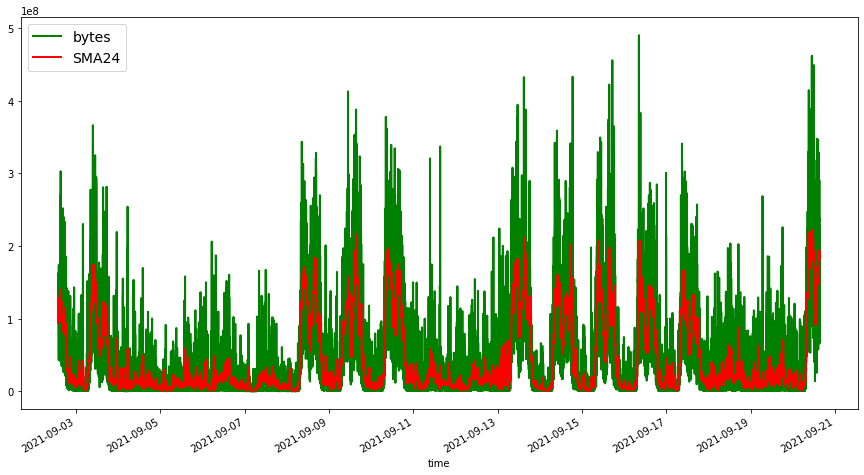

In [6]:
colors = ['green','red']
bytesext.plot(color=colors, linewidth=2, figsize=(15,8))
plt.legend(labels=['bytes','SMA24'], fontsize=14)

Observe que a curva da média móvel (`SMA24`) suaviza a curva da série principal, mostrando uma tendência.

## Autocorrelação ##

***
A autocorrelação é a **correlação cruzada** de um sinal (ou série) com ele **próprio**, é uma medida que informa o quanto uma variável aleatória é capaz de influenciar seus vizinhos. Abaixo temos a gráfico da autocorrelação da série `bytes`.
***

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

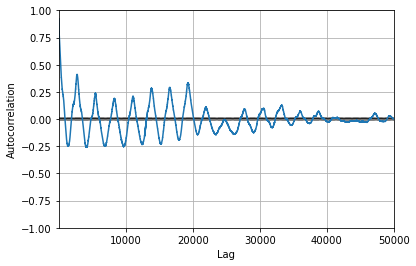

In [7]:
pd.plotting.autocorrelation_plot(bytes)

## Séries estacionárias ##

***
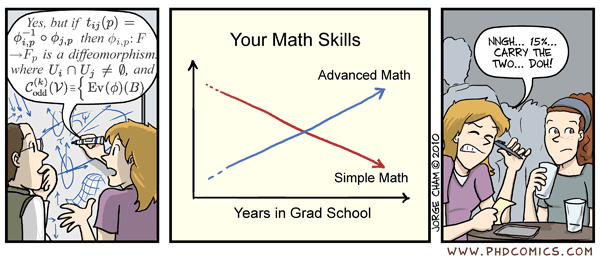

Uma **série estacionária** é uma série que se desenvolve aleatoriamente no tempo ao redor de uma média constante, refletindo alguma forma de equilíbrio estável. É a suposição mais frequente que se faz a respeito de uma série temporal.

A maioria dos procedimentos de análise estatística de séries temporais supõe que estas sejam estacionárias. Assim, caso isso não ocorra, será necessário transformar os dados originais por meio de diferenças sucessivas da série original, até obter uma série estacionária. De forma geral, basta encontrar até a segunda diferença para que a série se torne estacionária.

__Questão__: será que a série `bytes` que estamos usando como exemplo é estacionária?

Existe algum **teste estatístico** que nos mostra se determinada série é estacionária (ou não)?
***

## Teste de Dickey-Fuller aumentado (augmented Dickey-Fuller test) ##

***
Este teste foi desenvolvido por esta dupla de professores, Mr. *David Alan Dickey* e Mr. *Wayne Arthur Fuller*. 

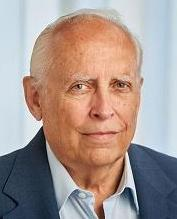D.A. Dickey 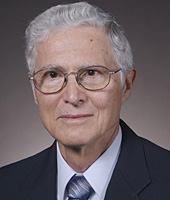 W.A. Fuller

Basicamente, o teste averigua se as variáveis envolvidas em uma série possui uma raiz unitária. Caso possua, média e variância não são constantes e, assim, a série não é estacionária.

A hipótese nula é que $H_{0}=$ {*Existe pelo menos uma raiz e a série não é estacionária*}.
***

Veja o código abaixo e a interpretação do resultado `result`.

In [8]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(bytes['bytes'])
result

(-6.729423806713746,
 3.325084079376832e-09,
 56,
 49943,
 {'1%': -3.430480941996576,
  '5%': -2.86159787367184,
  '10%': -2.566800804241718},
 1847432.4331443887)

Veja que `result` é uma tupla. Vamos interpretar os resultados mais importantes.

In [9]:
result[0]

-6.729423806713746

O resultado acima é o valor crítico da série.

In [10]:
result[1]

3.325084079376832e-09

Este valor é o *p-value*.

In [11]:
result[4]

{'1%': -3.430480941996576, '5%': -2.86159787367184, '10%': -2.566800804241718}

Estes múltiplos resultados são os valores T referentes respectivamente aos valores dos intervalos de confiança p=1%, 5%, 10%.

Compare cada um dos valores acima com resultado do valor crítico obtido `result[0]`. Note que o todos valores mostram que o série temporal é estacionária, pois os valores T estão acima do valor crítico.

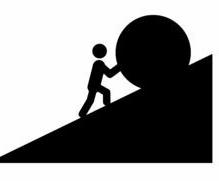
__DESAFIO 1: crie um output onde se compara os valores obtidos para estes intervalos de confiança com o valor crítico e coloque mensagens dizendo se a série é estacionária ou não.__

## Modelo ARIMA ##

***
Este modelo para análise e previsão de séries temporais é o mais utilizado atualmente. Serve tanto para as séries estacionárias como para as não-estacionárias, desde que não ocorra comportamento explosivo. 

**ARIMA** significa **Auto Regression**-**Integrate**-**Moving Average**, ou seja, modelo autoregressivo integrado com médias móveis. 

Na apostila elaborada pela Profa. Clarice Pachi, há a teoria referente a este modelo. Neste notebook, vamos mostrar uma implantação em Python do ARIMA a partir da publicação do Jason Brownlee, *Introduction to time series forecasting with Python*, distribuída no *site* https://machinelearningmastery.com/.


Para montar um modelo ARIMA, são necessários 3 parâmetros: $p,d,q$, onde $p$ representa a ordem de autoregressão __(AR)__, $d$ é o valor da integração __(I)__ e $q$ é a ordem de média móvel __(MA)__: $$ ARIMA(p,d,q). $$

A análise que precisa ser feita para encontrar os valores adequados de $(p,d,q)$ não é trivial e exige paciência. Uma maneira interessante de encontrar os valores é, inicialmente, definir um conjunto de valores para cada um dos parâmetros, por exemplo:

$$\begin{cases}
p= & \left\{ n_{i}\right\} _{i=0,\ldots n_{p}}\\
d= & \left\{ m_{j}\right\} _{j=0,\ldots m_{d}}\\
q= & \left\{ s_{k}\right\} _{k=0,\ldots s_{q}}
\end{cases}$$
sendo que $\left\{ n_{i}\right\} ,\left\{ m_{j}\right\} ,\left\{ s_{k}\right\} \in\mathbb{N}$, isto é, são números naturais.

Considere a série que está sendo analisada, que pode ser denotada por:$$\left\{ x_{t}\right\} _{t=0,\ldots,T}=x_{0},x_{1},\ldots,x_{T-1},x_{T}$$

Divida esta série em dois grupos, os primeiros $\frac{2}{3}$ elementos em um grupo e o restante, $\frac{1}{3}$, em outro grupo.

O primeiro grupo pode ser chamado de `history` e o segundo, `test`. 

Considere agora um conjunto de valores $(p,d,q)=(1,1,1)$, por exemplo. O modelo é montado a partir dos dados do grupo `history` com o conjunto de parâmetros. 

Em seguida, é possível __prever__ qual seria a sequência da série, ou seja, monta-se um novo conjunto denominado `predictions`.

Após ter calculado a série `predictions`, compare-a com a série `test`, e veja o quanto há de erro na previsão dos valores por meio de uma fórmula denominada *Root Median Square Error (RMSE)* (raiz do erro médio quadrático), dado por:

$$RMSE(\mathbf{x},\mathbf{y})=\frac{1}{\tau}\sqrt{\sum_{t=0}^{\tau}\left(x_{t}-y_{t}\right)^{2}}$$
onde $\mathbf{x}$ é a série `test` e $\mathbf{y}$, a série `predictions`.

Considere agora um novo conjunto de valores $(p,d,q) = (1,1,2)$; repita o procedimento, calcule o RMSE correspondente. Após obter vários valores de RMSE para distintos conjuntos $(p,d,q)$, observe qual deles obteve o __menor__ valor de RMSE. Portanto, este conjunto de parâmetros $(p,d,q)$ com o __menor__ erro RMSE é o __mais adequado__ para ser o modelo ARIMA para os dados que estão sendo analisados.
***

> O programa abaixo é lento, aguarde até sair o resultado `Best ARIMA ...`.

In [ ]:
#############################################
#  Grid Search ARIMA model hyperparameters  #
#############################################
#
# from Brownlee, Jason - "Introduction to time series forecasting with Python"
#
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import time

inicio = time.time()

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('\n ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE = %.3f' % (best_cfg, best_score))

# load dataset
seriesfile0 = './Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv'
series = read_csv(seriesfile0, header=0, sep=',', index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = [0, 1]
d_values = range(0, 1)
q_values = range(0, 1)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)
fim = time.time()
print(str(round((inicio-fim)/60,0))+' mins')

O programa é lento pois precisa fazer 8 combinações de $(p,d,q)$ em cima de mais de 1500 dados! Algumas combinações são desconsideradas, como $(1,1,1)$. O modelo determinado, portanto, é o ARIMA(1,0,0) neste sistema de *machine learning*, denominado *grid search* ou *model tuning*. 

Vamos considerar agora os seguintes valores para $(p, d, q)$:

In [46]:
p_values = [0,1,2,3,4,5]
d_values = range(0,5)
q_values = range(0,5)

No caso acima, o tempo de processamento gira em torno de 438 minutos (mais de 7 horas). **É possível melhorar este tempo se reescrevermos o script de forma a utilizar mais de um processador**. Normalmente, a linguagem Python é monoprocessado, mas há bibliotecas que permitem a utilização de mais de um processador, mas é preciso adaptar o algoritmo para tanto.

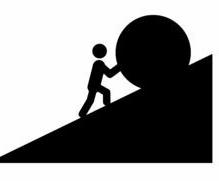
__DESAFIO 2: pesquisar sobre multiprocessamento e aplicar no script acima para melhorar o tempo gasto.__

Os resultados obtidos para esses novos valores para $(p,d,q)$ estão transcritos abaixo:

Pelo resultado acima, o modelo que mais se adequa para os dados de `bytes` é o modelo $ARIMA(p,d,q) = ARIMA(1,0,1)$. Nosso próximo passo é __compilar__
este modelo.

## Compilando o modelo ARIMA ##

Após descobrir quais os parâmetros para o modelo ARIMA, o próximo passo é compilar o modelo, isto é, vamos colocá-lo em um formato binário que nos permita fazer predições. Para tanto, vamos usar o código abaixo. Os resultados `PACS01 - Trafego Out VDX PACS01_To_CORE02.pkl` e `PACS01 - Trafego Out VDX PACS01_To_CORE02.npy` devem ser salvos para serem utilizados nas futuras predições.

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# from Brownlee, Jason - "Introduction to time series forecasting with Python"
#

from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
#
arimaorder = (1,0,1)
#
# filename of time series for bytes
downname = './Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv'
# filename for ARIMA saved model and parameters
pklname = './Data/PACS01 - Trafego Out VDX PACS01_To_CORE02.pkl'
npyname = './Data/PACS01 - Trafego Out VDX PACS01_To_CORE02.npy'
# read bytes csv file
s = read_csv(downname,header=0,index_col=0, parse_dates=True, squeeze=True, sep=',')
# prepare data
X = s.values
X = X.astype('float64')
# convert X values via Box Cox transform
transformed, lam = boxcox(X)
# Box Cox values
print('Lambda: %f' %lam)
# save PKL model
model = ARIMA(transformed, order=arimaorder)
model_fit = model.fit(disp=0)
model_fit.save(pklname)
numpy.save(npyname, [lam])

Lambda: 0.061246


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Algumas observações a serem feitas:

1. Os parâmetros $(p,d,q)$ estão transcritos na variável `arimaorder` como um tupla;

2. Estamos utilizando um recurso denominado `boxcox()`; esta técnica de estatística está explicada na seção seguinte;

3. O arquivo `PACS01 - Trafego Out VDX PACS01_To_CORE02.pkl` contém o modelo ARIMA baseado nos dados fornecidos e permitirá desenvolver as __previsões__ (forecasting) ou quais serão os futuros valores da série.

## Transformação de Box-Cox ##

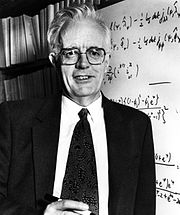 Sir David R. Cox   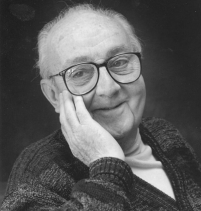  George E.P. Box

Diz a lenda que Sir __David Roxbee Cox__, em uma visita ao seu amigo __George Edward Pelham Box__ em Wisconsin, resolveram escrever um artigo para aproveitar a semelhante sonoridade de seus respectivos sobrenomes (Box-Cox). O trabalho foi publicado em 1964 no *Journal of the Royal Statistical Society, Series B, 26, 211-252* e se intitula *An analysis of transformations*. 

A transformação de Box-Cox permite que uma dada série, que apresenta uma distribuição não-normal, seja levada a se transformar em uma distribuição normal, dentro do possível. Com isto, diversas técnicas para avaliar intervalos de confiança e distribuição de erros podem ser melhor aplicadas.

Seja $\omega_{t}$ o valor transformado e $x_{t}$ o valor-alvo ou o valor a ser transformado; ${\lambda}$ é o parâmetro que se escolhe para permitir a melhor transformação. 

$$\omega_{t}=\begin{cases}
\log(x_{t}) & \lambda=0;\\
\frac{\left(x_{t}^{\lambda}-1\right)}{\lambda} & \lambda\neq0.
\end{cases}$$

Na biblioteca Python, há a função `scipy.stats.boxcox` que permite calcular o melhor valor para ${\lambda}$ (`lambda`).

## Fazendo predições ##

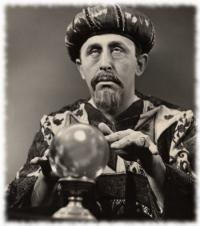

Chegou o momento que faremos uma predição, ou seja, vamos testar se o nosso modelo nos permite avaliar quais serão os próximos valores da série.

A partir do script abaixo e com o modelo salvo `PACS01 - Trafego Out VDX PACS01_To_CORE02.pkl`, vamos calcular os 3 próximos valores. __Não podemos nos esquecer de fazer a transformação inversa de Box-Cox__. Utilizamos a transformação para facilitar a montagem do modelo, mas ao fazer um prognóstico, é preciso retornar à situação antes da transformação. É por isto que existe um arquivo gravado denominado `PACS01 - Trafego Out VDX PACS01_To_CORE02.npy`, que contém, entre outros valores, o de ${\lambda}$. 

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# evaluate the finalized model on the validation dataset
# from Brownlee, Jason - "Introduction to time series forecasting with Python"
#
from statsmodels.tsa.arima_model import ARIMAResults
from math import exp
from math import log
import numpy

# invert box-cox transform
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)
    #load model
pklname = './Data/PACS01 - Trafego Out VDX PACS01_To_CORE02.pkl'
npyname = './Data/PACS01 - Trafego Out VDX PACS01_To_CORE02.npy'
txtresultname = './Data/forecast-PACS01 - Trafego Out VDX PACS01_To_CORE02.txt'
model_fit = ARIMAResults.load(pklname)
lam = numpy.load(npyname)
# Prediction
# 3 predictions <--------------------------
yhat = model_fit.forecast(3)
ptresultname = open(txtresultname,'w')
for p in list(range(0,3)):
    value0 = yhat[0][p]
    value0 = boxcox_inverse(value0, lam)
    print('>Predicted=%.3f' % value0)
    value1 = yhat[1][p]
    value1 = boxcox_inverse(value1, lam)
    print('>Standard Error=%.3f' % value1)
    value2 = yhat[2][p][0]
    value2 = boxcox_inverse(value2, lam)
    value3 = yhat[2][p][1]
    value3 = boxcox_inverse(value3, lam)
    print('Confidence Interval=(%.3f, %.3f)' %(value2,value3))
    ptresultname.write('predicted=%.3f; sterr=%.3f; interval=(%.3f, %.3f)\n' 
                       % (value0, value1, value2, value3))
print('END')
ptresultname.close()

>Predicted=88192226.909
>Standard Error=10.603
Confidence Interval=(15946982.972, 414672464.578)
>Predicted=81373359.983
>Standard Error=13.509
Confidence Interval=(11909740.950, 454043222.798)
>Predicted=75323166.624
>Standard Error=16.484
Confidence Interval=(9197430.771, 485150195.167)
END


Os valores estão guardados no arquivo `forecast-PACS01 - Trafego Out VDX PACS01_To_CORE02.txt`.

Está claro que os valores calculados estão dentro de uma margem de erro, tal como ocorrem nas previsões de temperatura do clima.

Vamos comparar os dados medidos com os dados calculados acima:

| instant | time | bytes | predicted | standard error|
| --- | --- | --- | --- | --- | 				
| 1 | 2020-10-05 15:00:00 | 1285,3618 | 1333,469 | 24,614 |
| 2 | 2020-10-05 21:00:00 |	1151,5631 | 1312,644 | 33,556 |
| 3 | 2020-10-06 03:00:00 | 1512,6865 | 1292,959 | 41,381 |

Ao comparar os valores, percebe-se que o erro aumenta à medida que os instantes vão evoluindo, o que é de se esperar.